In [1]:
import numpy as np
from numpy import sin, cos, pi
import matplotlib.pyplot as plt
from ibsen.orbit import Orbit
from ibsen.winds import Winds
from ibsen.ibs import IBS


In [2]:

DAY = 86400.
AU = 1.5e13

sys_name = 'psrb' 
orb = Orbit(sys_name = sys_name, n=1003)


In [3]:
from ibsen.winds import Winds

# having initialized orb:Orbit, initialize winds:Winds

winds = Winds(orbit=orb, sys_name = sys_name, alpha=10/180*pi, incl=23*pi/180,
              f_d=165, f_p=0.1, delta=0.02, np_disk=3, rad_prof='pl', r_trunk=None,
             height_exp=0.25, ns_b_ref=1, ns_r_ref=1e13)


Now it's time to do something useful. Let's calculate the spectrum of relativistic electrons in each point of IBS that we have just initialized. There are many parameters that you should/may specify for this, so the full list is in the example below right in the Python code, with descriptions and default values. 

Here I will only comment on the parameter ``cooling`` that specifies which model of electrons evolution would you like to use. 

First of all, you can set ``cooling='no'``, and the spectrum of electrons in each $s$ will be (numerically) set to the injection function $Q_\mathrm{inj}(s, E)$. Note that from the physical point of view this is nonsense, as $Q$ is the number of $\mathrm{e}^-$ injected per unit of time (per cm per eV) ($\mathrm{s}^{-1}$), so $Q\times (E/\dot E)$ gives the numer of particles (per cm per eV), but setting ``cooling='no'`` ignores the dimentions difference and just sets $n(s, E) \equiv Q(s, E)$.

All other options allow to find an electron spectrum $n(s, e) = d\dot N_e/ds/de$. There are several options of various stationary distributions in each point $s$. ''Stationary'' means that the equation
$$ \frac{\mathrm{d}(n(s, E) \dot E(s, E))}{\mathrm{d}E} = Q_\mathrm{inj}(s, E)$$ 
is being solved analytically in each point of $s$, yielding
$$ n(s, E) = \frac{1}{|\dot E(s,E)|} \int_E^\infty Q(s, \xi) \mathrm{d}\xi. $$ 
Here 
$$\dot E(s, E) = \eta_\mathrm{syn}\dot E_\mathrm{syn} (B(s), E) + \eta_\mathrm{IC}\dot E_\mathrm{IC} (u_\gamma(s), E) - \frac{E}{t_a}$$.

- ``cooling=stat_apex`` calculates the stationary e-spectrum on each $s$ using magnetic and photon fields as in the IBS apex;
- ``cooling=stat_ibs`` calculates the stationary e-spectrum on each $s$ using magnetic and photon fields in this point on IBS;
- ``cooling=stat_mimic`` calculates the stationary e-spectrum on each $s$ with the ''adiabatic time'' $t_a$ calculated to mimic the ''proper'' advection equation solution:
  $$
  t_a = \frac{s_\mathrm{max~g}}{\Gamma_\mathrm{max}-1} \sqrt{\Gamma_\mathrm{bulk}(s)^2-1}.
  $$
- ``cooling=adv`` solves the 2-dimentional advection-over-s + coooling-over-e equation
$$
    v(s) \frac{\partial n}{\partial s} + \frac{\partial (n \dot E(s, E))}{\partial E} = \tilde{Q}_\mathrm{inj}(s, E)
$$
with the same $\dot E$ as before but without ''advection losses''.

**Note.** I was also working on the idea of the equation with "leakage". If we change the term $v \partial / \partial s \rightarrow 1/T_\mathrm{eff}$ (and it can be done accurately), the following equation with leakage is obtained, with s as a parameter:
$$
\frac{\mathrm{d}(n\dot E)}{\mathrm{d}E} + \frac{n}{T_\mathrm{eff}} = Q_\mathrm{inj}
$$
which also has an analytical solution and, anyway, it is ODE and so it seems like it's a good idea to reduce the 2-simentional PDE to a set of (independent, for each $s$) ODE. In reality, though, it turnes out that solvind it we meet some numerical problems and the total time to solve this for each $s$ takes approximately the same time as just solving the transport PDE. So for now I allowed options ``cooling=leak_apex``, ``cooling=leak_ibs``, and ``cooling=leak_mimic``, but I have not tested them, and it seems like some numerical problems sometimes arise there. 

**The class ibs you provide should be ``ibs:IBS``, not  ``ibs:IBS_norm``.**

**The photon field is calculated with the ``Topt`` that your dictionary of parameter should have contained at the stage of ``orbit:Orbit`` initialization. The photon field if a purely blackbody optical star radiation.**

At the moment of initializing the class, the spectra $n_e(s,E)$ are not calculated yet (as the calculation may take a while but you maybe just want to know how the magnetic field is distributed along the shock and don't care for e-spectrum). To actually calculate $n_e$, you should do  ``els.calculate()``.

At the end of calculation, the electron spectrum $n(E) = dN_e/de$ is set in each point of an IBS, as well as e-spectra in comoving frames:
\begin{equation}
    n(E) \rightarrow n'(E') = \frac{1}{2}\int_{-1}^1 \frac{n(E'\Gamma(1+\beta\mu'))}{\Gamma(1+\beta\mu')} d\mu' = 
    \frac{1}{2\, \beta \Gamma} \int_{\Gamma(1-\beta)}^{\Gamma(1+\beta)} n(E' \,\eta)\frac{d\eta}{\eta}.
\end{equation}

It can pe trivially proved that the total number of electrons is conserved: $\int_0^\infty n(E) d E = \int_0^\infty n'(E') d E'$.

eff beta is 0.05451486229079562
stat_ibs

stat_mimic

leak_mimic

adv


/home/alvkuzin/whole_psrb_project/src/ibsen/el_ev.py:281: RuntimeWarning: overflow encountered in exp
  weight_Q = Qs * np.exp(cumP - cumP_Emax)
/home/alvkuzin/whole_psrb_project/src/ibsen/el_ev.py:281: RuntimeWarning: overflow encountered in multiply
  weight_Q = Qs * np.exp(cumP - cumP_Emax)
/home/alvkuzin/whole_psrb_project/src/ibsen/el_ev.py:281: RuntimeWarning: invalid value encountered in multiply
  weight_Q = Qs * np.exp(cumP - cumP_Emax)
/home/alvkuzin/miniconda3/envs/gpy/lib/python3.11/site-packages/scipy/integrate/_quadrature.py:328: RuntimeWarning: overflow encountered in multiply
  res = np.cumsum(d * (y[slice1] + y[slice2]) / 2.0, axis=axis)


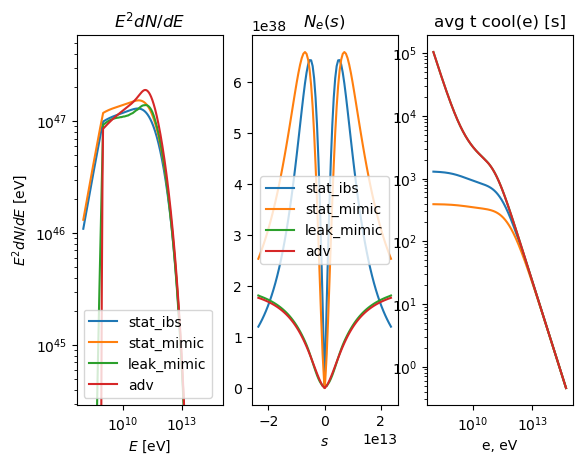

In [4]:
from ibsen.el_ev import ElectronsOnIBS
from scipy.integrate import trapezoid

##### let's again initialize an IBS at, say, 15 days after periastron. Let's do that for three different 
##### models of cooling: stat_ibs, stat_mimic, and adv.
t = 15 * DAY
Nibs = 41
ibs = IBS(winds=winds,
          gamma_max=3.,
          s_max=1.,
          s_max_g=4.,
          n=Nibs,
           t_to_calculate_beta_eff=t) 
print('eff beta is', ibs.beta)
r = orb.r(t=t)
rsp = r - winds.dist_se_1d(t)
###  Let's do that for four different 
##### models of cooling: stat_ibs, stat_mimic, leak_mimic, and adv.
rpe = r - rsp
fig, ax = plt.subplots(nrows=1, ncols=3)

for cooling in ('stat_ibs',
                'stat_mimic',
                'leak_mimic', # can trigger some warnings, not tested, and doesn't work properly!
                'adv'
                ):
    if cooling in ('adv', 'leak_mimic'): eta_a = 1e20 # to dump ``adiabatic losses`` for advection model
    else: eta_a = 2
    print(cooling)
    els = ElectronsOnIBS(
                         ibs=ibs,
                         cooling=cooling, 
                         to_inject_e = 'ecpl', 
                         to_inject_theta = '3d', 
                         ecut = 5.e12,  
                         p_e = 1.8, 
                         to_cut_e = True,
                         emin = 1e9,
                         emin_grid=1e8,
                         emax = 5e14, 
                         norm_e = 1.e37, 
                         eta_a = eta_a, 
                         eta_syn = 1.,
                         eta_ic = 1.,
                         to_cut_theta =  False, 
                         where_cut_theta = pi/2, 
                         ) 
    
    els.calculate()
    els.peek(ax=ax, 
             show_many=False # whether to show several spectra at several S. We don't need it here. Default is True
            )
    print()
        
